# Project 02 - Image Processing

## Student Information

- Full name: Đinh Nguyễn Gia Bảo
- Student ID: 22127027
- Class: 22CLC03

## Required Libraries

In [87]:
# IMPORT YOUR LIBS HERE
import numpy as np #For calculate matrix
from PIL import Image, ImageEnhance #pip install Pillow, use for read and write image
import matplotlib.pyplot as plt #For display image

## Function Definitions

In [88]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    #Read image from img_path
    img = Image.open(img_path)
    #Convert image to 2D array
    img_2d = np.array(img)

    return img_2d



def show_img(img):
    '''
    Show image

    Parameters
    ----------
    img : <your type>
        Image
    '''

    # YOUR CODE HERE
    #Display image
    plt.imshow(img)

    #Turn off axis -> not display axis -> make image look better
    plt.axis('off')

    #Display image
    plt.show()


def save_img(img, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img : <your type>
        Image
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    #Convert 2D array to image by using Image.fromarray
    img = Image.fromarray(img.astype('uint8'))

    #Save image in png and pdf format
    img.save(img_path + '.png')
    img.save(img_path + '.pdf')


#--------------------------------------------------------------------------------
# YOUR FUNCTIONS HERE

def setBrightness(img, brightness):
    '''
    Set brightness for image

    Parameters
    ----------
    img : <your type>
        Image
    brightness : int
        Brightness value

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    
    # Bước 2: Tạo một mảng chứa giá trị độ sáng mới
    brightness_array = np.full(img.shape, brightness, dtype=np.int16)
    
    # Bước 3: Thực hiện phép cộng mảng độ sáng với mảng ảnh ban đầu
    img_enhanced = img.astype(np.int16) + brightness_array
    
    # Bước 4: Giới hạn giá trị của mỗi điểm ảnh vào trong khoảng [0, 255]
    img_enhanced = np.clip(img_enhanced, 0, 255)
    
    # Bước 5: Chuyển đổi bức ảnh về dạng uint8
    img_enhanced = img_enhanced.astype(np.uint8)
    
    return img_enhanced

def setContrast(img, contrast):
    '''
    Set contrast for image

    Parameters
    ----------
    img : <your type>
        Image
    contrast : int
        Contrast value

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    # Bước 1: Đảm bảo giá trị contrast nằm trong khoảng [-100, 100]
    contrast = np.clip(contrast, -100, 100)

    # Bước 2: Chuyển đổi giá trị contrast từ phần trăm sang hệ số
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))

    # Bước 3: Áp dụng điều chỉnh contrast cho ảnh
    mean = np.mean(img, axis=(0, 1), keepdims=True)  # Tính giá trị trung bình của ảnh
    img_enhanced = factor * (img - mean) + mean

    # Bước 4: Giới hạn giá trị của mỗi điểm ảnh vào trong khoảng [0, 255]
    img_enhanced = np.clip(img_enhanced, 0, 255).astype(np.uint8)

    return img_enhanced

def flip_horizontal(img):
    # Bước 2: Lật ảnh theo chiều ngang
    img_flipped = img[:, ::-1]
    
    # Bước 3: Chuyển đổi bức ảnh về dạng uint8
    img_flipped = img_flipped.astype(np.uint8)
    
    return img_flipped

def flip_vertical(img):
    # Bước 2: Lật ảnh theo chiều dọc
    img_flipped = img[::-1, :]
    
    # Bước 3: Chuyển đổi bức ảnh về dạng uint8
    img_flipped = img_flipped.astype(np.uint8)
    
    return img_flipped

def rgb2grayscale(img):
    # Bước 2: Mảng trọng số cho R, G, B
    r_weight, g_weight, b_weight = 0.299, 0.587, 0.114

    # Bước 3: Trích dẫn 3 kênh màu (RGB)
    red_channel = img[:, :, 0]
    green_channel = img[:, :, 1]
    blue_channel = img[:, :, 2]

    # Bước 4: Thực hiện tích vô hướng (dot product) giữa các giá trị trong kênh màu với trọng số tương ứng
    grayscale_img = (r_weight * red_channel + g_weight * green_channel + b_weight * blue_channel)

    # Bước 6: Giới hạn các giá trị điểm ảnh vào khoảng [0, 255] và chuyển đổi bức ảnh về dạng uint8
    grayscale_img = np.clip(grayscale_img, 0, 255).astype(np.uint8)

    return grayscale_img

def convertToSepia(img):
    '''
    Convert image to sepia

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    #Convert image to sepia
    img = np.dot(img[...,:3], [0.393, 0.769, 0.189])

    return img

def blurImage(img):
    '''
    Blur image

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    #Blur image
    img = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]]) / 9

    return img

def sharpenImage(img):
    '''
    Sharpen image

    Parameters
    ----------
    img : <your type>
        Image

    Returns
    -------
        Image
    '''

    # YOUR CODE HERE
    #Sharpen image
    img = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

    return img

# def cropImageBySize(img, size):

# def cropImageToCircleFrame(img, frame):

# def cropImageToElipFrame(img, frame):

# def zoomImage(img, ratio):

def grayscale(img):
  '''
  Convert the image from RGB format to grayscale

  Input:
    img: np.ndarray
      An image with in ndarry format

  Output:
    grayscale_img: np.ndarray
      A new image that have been converted into grayscale
  '''
  # Define the weights for each color channel
  weight = np.array([0.299, 0.587, 0.114])

  # Extract the three color channels using slicing
  img_rgb = img[..., :3]

  # Perform a dot product of the color channels with the weights to get the grayscale values
  grayscale_img = np.dot(img_rgb, weight)

  # Limit the value of each pixel to [0, 255]
  grayscale_img = np.uint8(np.clip(grayscale_img, 0, 255))

  return grayscale_img

<ins>Note:</ins> For clarity, include docstrings with each function.

## Your tests

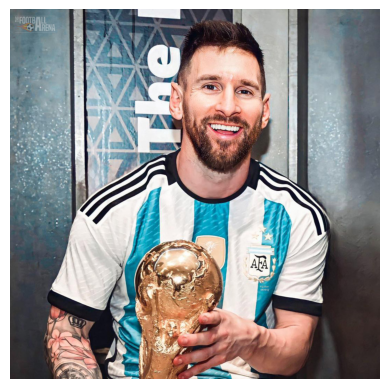

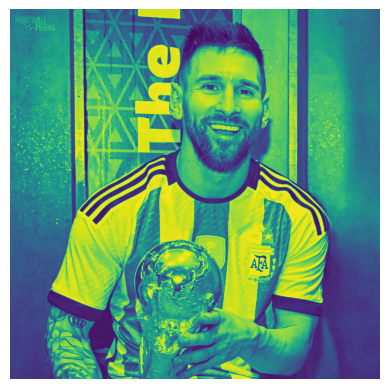

In [89]:
# YOUR CODE HERE

myArr = read_img('messi.jpg')
show_img(myArr)

#BRIGHTNESS
# # myArr2 = setBrightness(myArr, -50)
# # show_img(myArr2)

# myArr3 = setBrightness(myArr, 50)
# show_img(myArr3)

# myArr4 = setBrightness(myArr, -50)
# show_img(myArr4)

#CONTRAST
# myArr2 = setContrast(myArr, 50)
# show_img(myArr2)

# myArr3 = setContrast(myArr, -50)
# show_img(myArr3)

#Flip
# Lật ảnh theo chiều ngang
# horizontal_flipped_image = flip_horizontal(myArr)
# show_img(horizontal_flipped_image)

# # Lật ảnh theo chiều dọc
# vertical_flipped_image = flip_vertical(myArr)
# show_img(vertical_flipped_image)

#Convert to gray
grayscale_image = grayscale(myArr)
show_img(grayscale_image)

## Main FUNCTION

In [90]:
# YOUR CODE HERE

In [91]:
# Call main function